In [20]:
from tensorflow.keras.datasets import mnist

# **Step 01: Load Dataset**

In [21]:
# Load MNIST data
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# **Step 02: Data Splitting**

In [22]:
# Split training into training (80%) and validation (20%)
X_train, X_val = X_train_full[:48000] / 255.0, X_train_full[48000:] / 255.0
y_train, y_val = y_train_full[:48000], y_train_full[48000:]

In [23]:
print(f"Training: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

Training: (48000, 28, 28), Validation: (12000, 28, 28), Test: (10000, 28, 28)


# **Step 03: Model Training**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [25]:
# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 784 pixels
    Dense(128, activation='relu'),   # Hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

In [26]:
# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use "categorical_crossentropy" if one-hot encoded
    metrics=['accuracy']
)

In [27]:
# Train for 10 epochs with batch_size=64
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8380 - loss: 0.5695 - val_accuracy: 0.9511 - val_loss: 0.1750
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9526 - loss: 0.1600 - val_accuracy: 0.9621 - val_loss: 0.1296
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9672 - loss: 0.1114 - val_accuracy: 0.9663 - val_loss: 0.1114
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9775 - loss: 0.0788 - val_accuracy: 0.9663 - val_loss: 0.1156
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9819 - loss: 0.0644 - val_accuracy: 0.9732 - val_loss: 0.0919
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9850 - loss: 0.0497 - val_accuracy: 0.9718 - val_loss: 0.0942
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9884 - loss: 0.0402 - val_accuracy: 0.9743 - val_loss: 0.0865
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9916 - loss: 0.0308 - val_accuracy: 0.

# **Step 04: Final Test Evaluation**

In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 16.9148
Test Accuracy: 0.9761


# **Step 05: Save model for Future Predictions**

In [29]:
model.save('mnist_model.h5')

# **Step 06: Sample Predictions**

In [30]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Select 5 random test samples
sample_indices = np.random.choice(len(X_test), 5)
samples = X_test[sample_indices]
true_labels = y_test[sample_indices]

In [32]:
# Make predictions
predicted_probs = model.predict(samples)
predicted_labels = np.argmax(predicted_probs, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


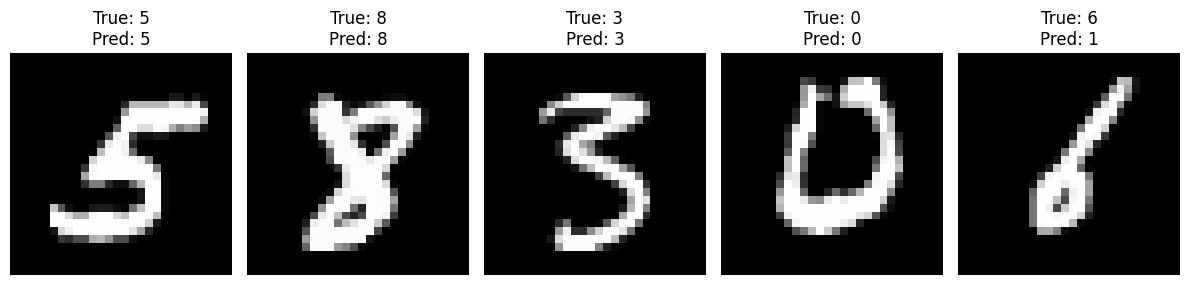

In [33]:
# Display results
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(samples[i], cmap='gray')
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()